<a href="https://colab.research.google.com/github/carlosheadst/RedesNeurais-ModeloQueInfereResultadoDeFormula/blob/main/Hello_World_Rede_Neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#O Hello World de Deep Learning com Redes Neurais

## Problemática



Considere o seguinte problema: Você está construindo um sistema que realiza o reconhecimento de atividades para monitorar o condicionamento físico. Você pode ter acesso à velocidade com que uma pessoa está andando e tentar inferir sua atividade com base nessa velocidade usando uma condicional.

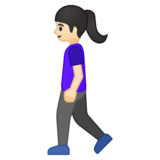


```
if (speed < 4) {
  status = WALKING;
}
```

Você pode estender isso para correr com outra condição.

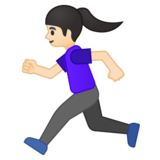

```
if (speed < 4) {
  status = WALKING;
} else {
  status = RUNNING;
}
```

Em uma condição final, você pode detectar ciclos semelhantes.

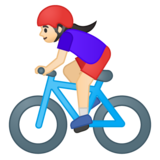

```
if(speed < 4) {
  status = WALKING;
} else if(speed < 12) {
  status = RUNNING;
} else {
  status = BIKING;
}
```

Agora, considere o que acontece quando você deseja incluir uma atividade, como golfe. É menos óbvio como criar uma regra para determinar a atividade.

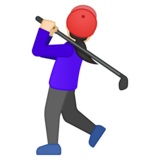

```
// E agora?
```

É extremamente difícil escrever um programa que reconheça a atividade do golfe, então o que você faz? Você pode usar o Machine Learning para resolver o problema.

## O que é Machine Learning

Considere a maneira tradicional de criar aplicativos, conforme representado no diagrama a seguir:
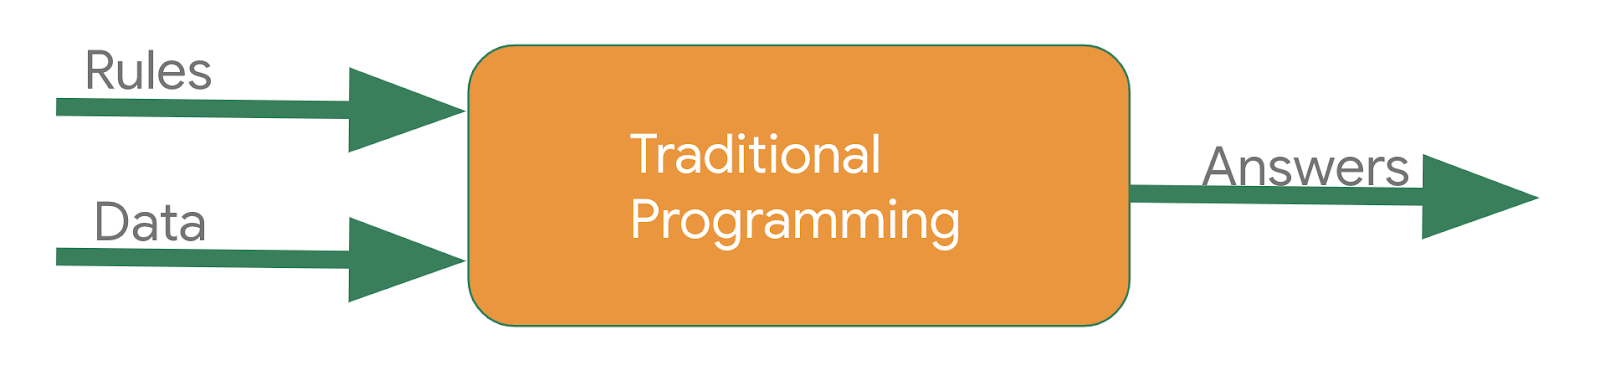
Você expressa regras em uma linguagem de programação. Elas agem sobre seus dados e seu programa fornece respostas. No caso da de detecção de atividade, as regras (o código que você escreveu para definir os tipos de atividade) agiram sobre os dados (a velocidade de movimento da pessoa) para produzir uma resposta: o valor de retorno da função para determinar o status da atividade do usuário (se ele estava caminhando, correndo, pedalando ou fazendo outra coisa).

O processo de detecção desse status de atividades via ML é muito semelhante, apenas os eixos são diferentes.

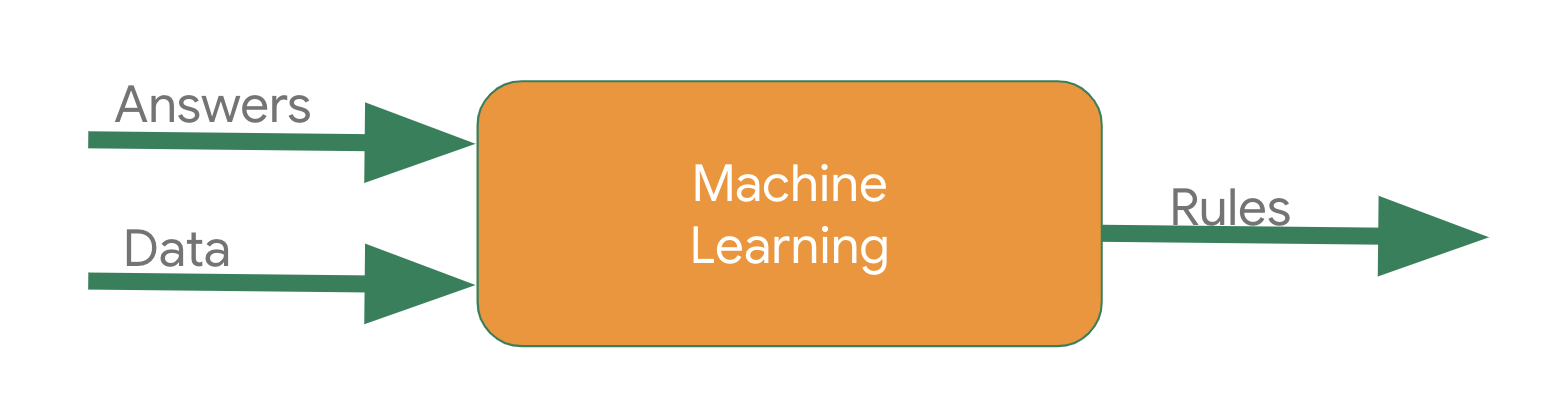

Em vez de tentar definir as regras e expressá-las em uma linguagem de programação, você fornece as respostas (normalmente chamadas de rótulos ) junto com os dados, e a máquina infere as regras que determinam a relação entre as respostas e os dados. Por exemplo, seu cenário de detecção de atividade pode ser assim em um contexto de ML:

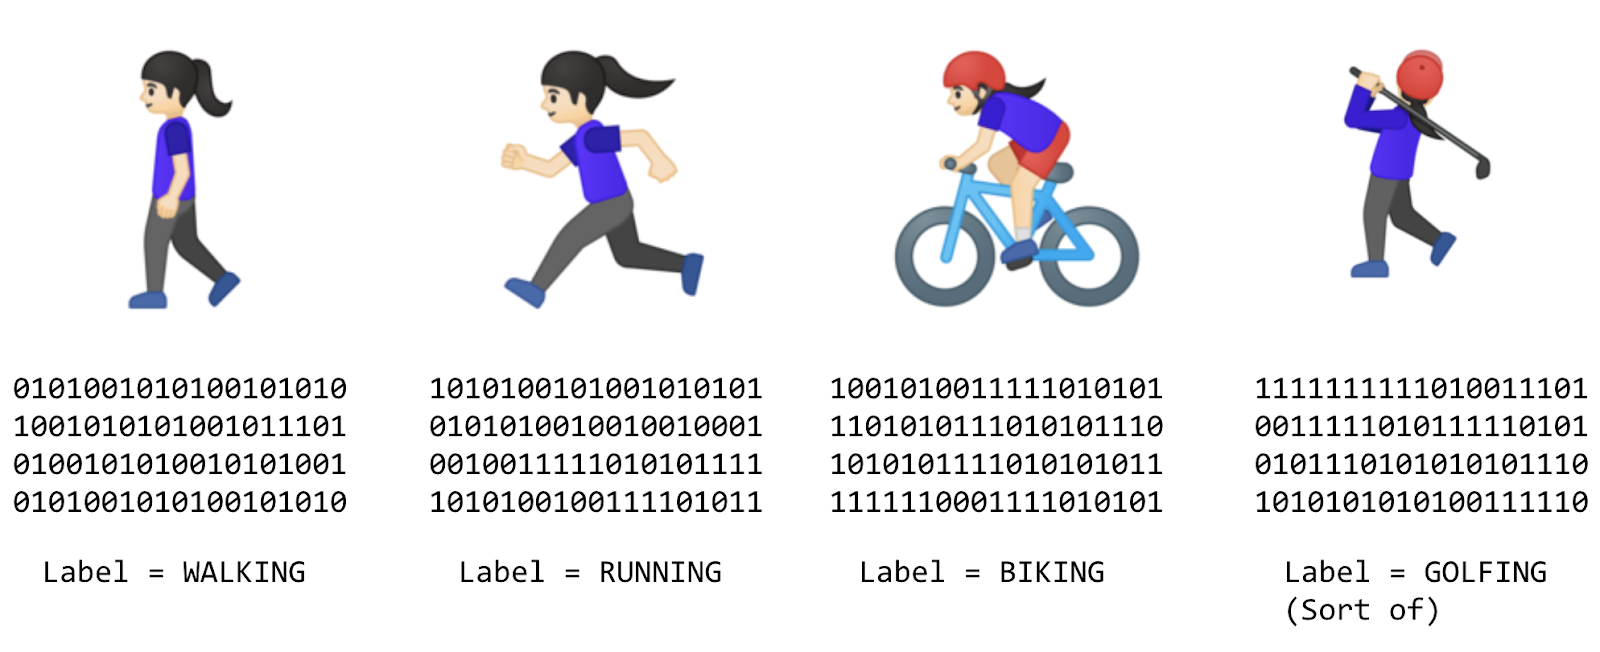

Você reúne muitos dados e os rotula para dizer efetivamente: "É assim que se parece um andar" ou "É assim que se parece uma corrida". Então, o computador pode inferir as regras que determinam, a partir dos dados, quais são os padrões distintos que denotam uma determinada atividade.

Além de ser um método alternativo para programar esse cenário, essa abordagem também dá a você a capacidade de abrir novos cenários, como o do golfe, que pode não ter sido possível sob a abordagem da programação tradicional baseada em regras.

Na programação tradicional, seu código é compilado em um binário que normalmente é chamado de programa. No ML, o item que você cria a partir dos dados e rótulos é chamado de modelo.

Então se você voltar a este diagrama:

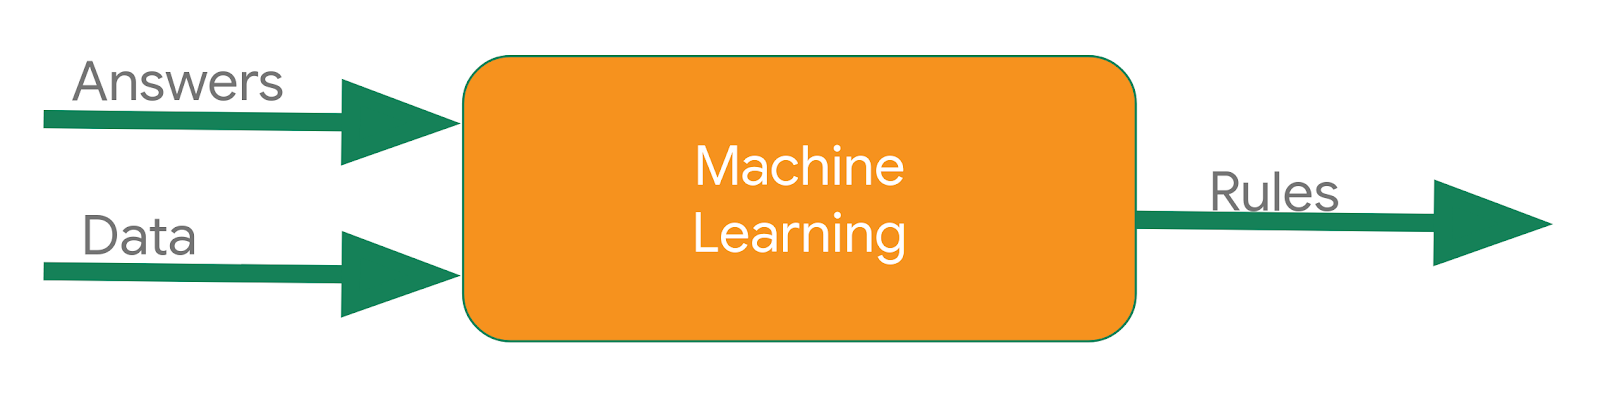

Considere o resultado disso como um modelo, que é usado assim no tempo de execução:

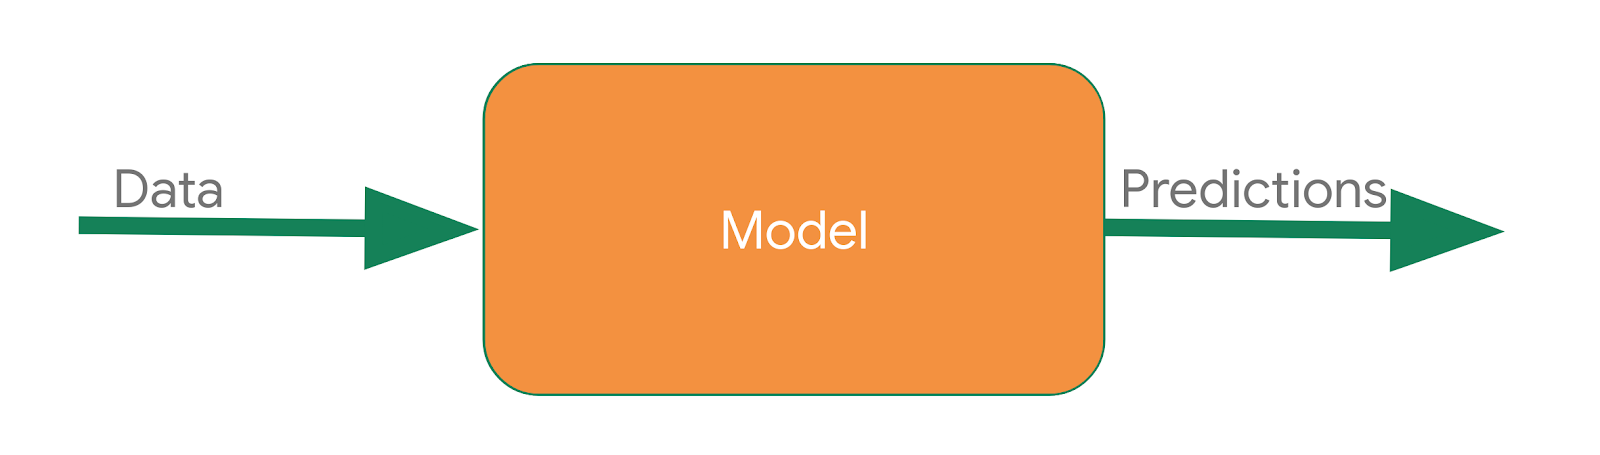

Você transmite ao modelo alguns dados e o modelo usa as regras que inferiu do treinamento para fazer uma previsão, como "Esses dados parecem com caminhada" ou "Esses dados parecem com ciclismo".

## Problema



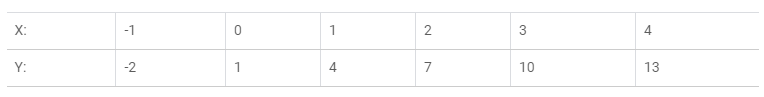

Ao olhar para eles, você pode notar que o valor de X está aumentando em 1 conforme você lê da esquerda para a direita e o valor correspondente de Y está aumentando em 3. Você provavelmente pensa que Y é igual a 3X mais ou menos alguma coisa. Então, você provavelmente olharia para 0 em X e veria que Y é 1, e chegaria à relação Y = 3X + 1.

Este código em uma paradigma estruturado ficaria assim.
```
float my_function(float x) {
    float y = (3 * x) + 1;
    return y;
}
```
Então, como você treinaria uma rede neural para fazer a tarefa equivalente? Usando dados! Ao alimentá-lo com um conjunto de Xs e um conjunto de Ys, ele deve ser capaz de descobrir a relação entre eles.

Obviamente, este é um paradigma muito diferente daquele ao qual você está acostumado, então vamos analisá-lo peça por peça.

## Importações

Vamos começar com nossas importações. Aqui, estamos importando o TensorFlow e chamando-o de tf para facilitar o uso.

Em seguida, importamos uma biblioteca chamada numpy, que nos ajuda a representar nossos dados como listas de maneira fácil e rápida.

A estrutura para definir uma rede neural como um conjunto de camadas sequenciais é chamada de keras, por isso também a importamos.

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

## Definir e compilar a rede neural
A seguir, criaremos a rede neural mais simples possível. Ele tem 1 camada, e essa camada tem 1 neurônio, e a forma de entrada para ela é de apenas 1 valor.

In [ ]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

Agora compilamos nossa Rede Neural. Quando fazemos isso, temos que especificar 2 funções, uma Loss (perda) e um optimizer (otimizador).

O que acontece:

Sabemos que, em nossa função, a relação entre os números é y = 3x + 1.

Quando o computador está tentando 'aprender' isso, ele faz uma suposição ... talvez y = 10x + 10. A função LOSS mede as respostas adivinhadas em relação às respostas corretas conhecidas e mede o quão bem ou mal ela se saiu.

Em seguida, ele usa a função OPTIMIZER para fazer outra estimativa. Com base em como a função Loss funcionou, ele tentará minimizar a perda. Nesse ponto, talvez ele apareça com algo como y = 5x + 5, que, embora ainda seja muito ruim, está mais perto do resultado correto (ou seja, a perda é menor).

Ele repetirá isso para o número de EPOCHS (épocas) que você verá em breve. Mas, primeiro, é assim que dizemos a ele para usar 'MEAN SQUARED ERROR' para a perda e 'STOCHASTIC GRADIENT DESCENT' (sgd) para o otimizador.

In [ ]:
model.compile(optimizer='sgd', loss='mean_squared_error')

## Fornecendo os dados
Em seguida, inseriremos alguns dados. Neste caso, estamos pegando 6 xs e 6ys. Você pode ver que a relação entre eles é que y = 3x-1, então onde x = -1, y = -2 etc, etc.

Usamos o numpy para essa tarefa utilizando seu método array.

In [ ]:
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-2.0, 1.0, 4.0, 7.0, 10.0, 13.0], dtype=float)

# Treinamento da Rede Neural


O processo de treinamento da rede neural, onde ela "aprende" a relação entre os Xs e os Ys, está na chamada **model.fit** . É aqui que ele percorrerá o ciclo de que falamos acima, fazendo um palpite, medindo o quão bom ou ruim ele é (também conhecido como a perda), usando o otimizador para fazer outro palpite etc. Ele fará isso pelo número de épocas que especificamos. Ao executar este código, você verá a perda do lado direito.

In [ ]:
model.fit(xs, ys, epochs=500)

Epoch 1/500
1/1 [==============================] - 1s 566ms/step - loss: 20.3033
Epoch 2/500
1/1 [==============================] - 0s 6ms/step - loss: 15.9930
Epoch 3/500
1/1 [==============================] - 0s 7ms/step - loss: 12.6015
Epoch 4/500
1/1 [==============================] - 0s 6ms/step - loss: 9.9328
Epoch 5/500
1/1 [==============================] - 0s 5ms/step - loss: 7.8328
Epoch 6/500
1/1 [==============================] - 0s 5ms/step - loss: 6.1802
Epoch 7/500
1/1 [==============================] - 0s 5ms/step - loss: 4.8797
Epoch 8/500
1/1 [==============================] - 0s 6ms/step - loss: 3.8562
Epoch 9/500
1/1 [==============================] - 0s 11ms/step - loss: 3.0506
Epoch 10/500
1/1 [==============================] - 0s 4ms/step - loss: 2.4164
Epoch 11/500
1/1 [==============================] - 0s 4ms/step - loss: 1.9172
Epoch 12/500
1/1 [==============================] - 0s 5ms/step - loss: 1.5240
Epoch 13/500
1/1 [==============================] - 0s 

É possível notar que nas primeiras épocas, o valor de perda é muito grande, mas fica menor a cada etapa. Conforme o treinamento vai avançando, a perda vai ficando menor, no fim do treinamento é possível perceber que a perda é extremamente pequena, mostrando que nosso modelo está fazendo um ótimo trabalho de inferir a relação entre os números.

Provavelmente não precisamos de todas as 500 épocas que especificamos, conseguimos notar que por volta da época 223 o modelo ja está com um valor baixíssimo de perda.

Ok, agora temos um modelo que foi treinado para aprender o relacionamento entre X e Y. Podemos usá-lo com o método **model.predict** para que ele descubra o Y para um X anteriormente desconhecido. Então, por exemplo, se X = 10, teoricamente o resultado deve ser 31.

In [ ]:
print(model.predict([10.0]))

[[31.00521]]


Não deu o resultado 31 exato, mas por que?

Lembre-se de que as redes neurais lidam com probabilidades, portanto, conforme os dados com os quais alimentamos o nosso modelo, ele calculou que há uma probabilidade muito alta de que a relação entre X e Y seja Y = 3X + 1, mas com apenas 6 pontos de dados no treinamento podemos não saber com certeza. Como resultado, o resultado para 10 é muito próximo de 31, mas não necessariamente 31.